# TP noté n°4 : Bagging and Random Forests

### David Jia

Math question : A single binary independent classifier with p > 0.5 as the probability of correct prediction follows a Bernoulli distribution with parameter p. So with L binary independent classifiers, the prediction follows a Binomial distribution with parameters p and L.

### 1)  

In [151]:
from scipy.stats import binom 
p = 0.7
L = 10
rv = binom(L,p)
mean, var, skew, kurt = binom.stats(L, p, moments='mvsk')

In [152]:
print(mean)

7.0


## Bagging 

### Q1

In [176]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

def bagging_tree(rng, X, y, n_estimators, tree_max_depth, bagging_max_depth, max_samples):  

    tree = DecisionTreeRegressor(random_state=0)
    tree.fit(X, y)
    bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth = bagging_max_depth), n_estimators=n_estimators, bootstrap=True, oob_score=True, 
                               random_state=rng, max_samples=max_samples)
    bagging.fit(X, y)
    
    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_true = np.sin(X_test)
    y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)
    
    # Print the scores
    print("Tree score : " + str(tree.score(X_test, y_true)))
    print("Bagging score : " + str(bagging.score(X_test, y_true)))

    return X_test, y_true, y_tree, y_bagging

In [177]:
# Plot the results 
def plot_BagTree(X_test, y_true, y_tree, y_bagging, title):
    plt.figure(figsize=(12, 8))
    plt.plot(X, y, 'o', c="k", label="data")
    plt.plot(X_test, y_true, "-k", label="True Regressor")
    plt.plot(X_test, y_tree, "-m", label="Tree Regressor")
    plt.plot(X_test, y_bagging, "-c", label='Bagging Regressor')

    plt.title(title)
    plt.legend(loc=1, numpoints=1)
    plt.show()

Tree score : 0.96151050791
Bagging score : 0.979898892762


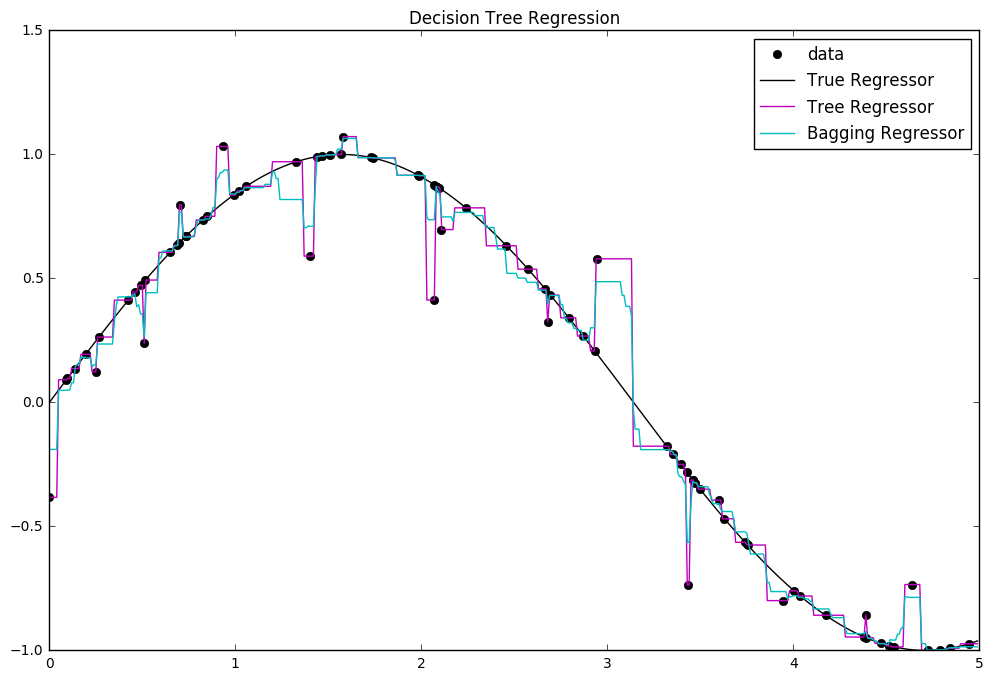

In [180]:
X_test, y_true, y_tree, y_bagging = bagging_tree(rng, X, y, n_estimators, tree_max_depth, bagging_max_depth, 1.0)
plot_BagTree(X_test, y_true, y_tree, y_bagging, "Decision Tree Regression")

On the figure, we can see that with the Tree Regressor, we have a fonction passing by all the points, even the outliers. With the Bagging Regressor, the regression is smoother and is more like a mean of the points, so the outliers have less impact on the regression. 

### Q2

Tree score : 0.96151050791
Bagging score : 0.983967997641
Tree score : 0.96151050791
Bagging score : 0.98197072418
Tree score : 0.96151050791
Bagging score : 0.981938918543
Tree score : 0.96151050791
Bagging score : 0.981967346425
Tree score : 0.96151050791
Bagging score : 0.982249153814


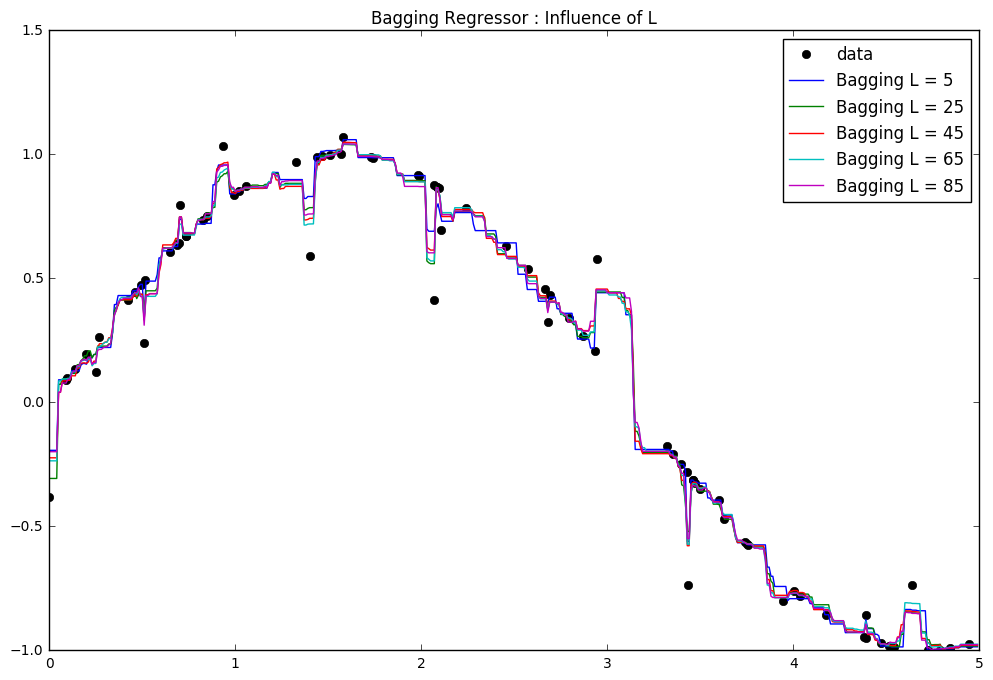

In [181]:
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
for i in range(5,100,20):
    X_test, y_true, y_tree, y_bagging = bagging_tree(rng, X, y, i, tree_max_depth, bagging_max_depth, 1.0)    
    plt.plot(X_test, y_bagging, label='Bagging L = '+ str(i))
    
plt.title("Bagging Regressor : Influence of L")
plt.legend(loc=1, numpoints=1)
plt.show()

When L decreases, the regressor tends to pass by each point, so the error will be higher because the outliers' impact becomes more important. 

Tree score : 0.96151050791
Bagging score : 0.986372211562
Tree score : 0.96151050791
Bagging score : 0.980753847964
Tree score : 0.96151050791
Bagging score : 0.981956319435
Tree score : 0.96151050791
Bagging score : 0.9790758859
Tree score : 0.96151050791
Bagging score : 0.983636759087


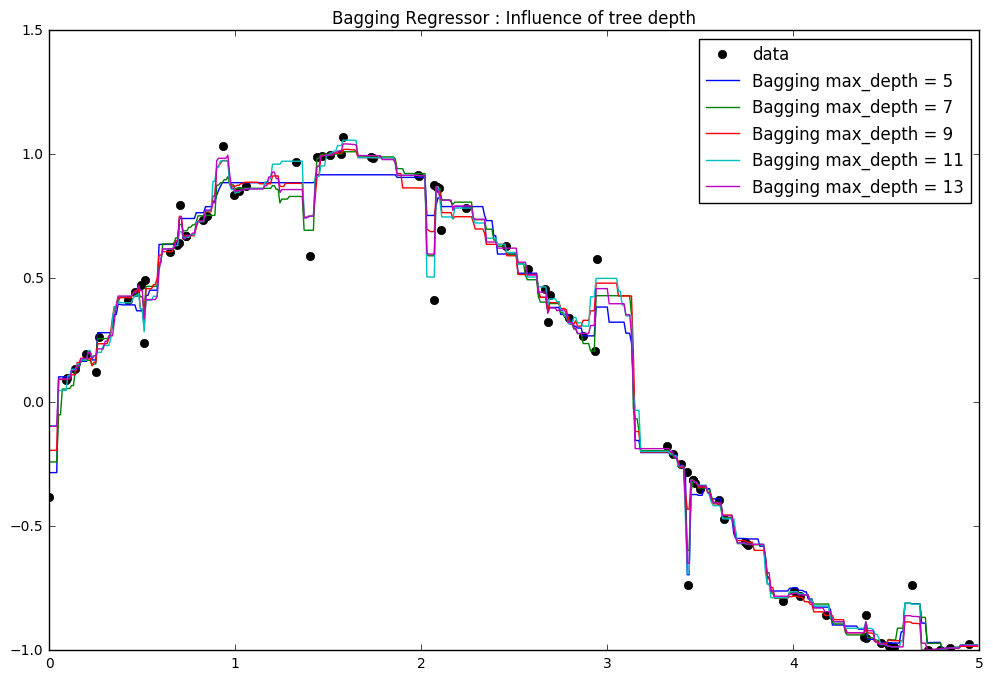

In [184]:
n_estimators = 10
tree_max_depth = 10
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
for i in range(5,15,2):
    X_test, y_true, y_tree, y_bagging = bagging_tree(rng, X, y, n_estimators, tree_max_depth, i, 1.0)    
    plt.plot(X_test, y_bagging, label='Bagging max_depth = '+ str(i))
    
plt.title("Bagging Regressor : Influence of tree depth")
plt.legend(loc=1, numpoints=1)
plt.show()

We observe that when the tree depth decreases, the regression tends to be more like a mean, whereas when the tree depth increases, the regression becomes more accurate. In any case, the bagging regressor doesn't necessarly pass by each point, contrary to the decision tree regressor. Hence, the outliers' impact is less consequent.

### Q3 

In [185]:
X_test, y_true, y_tree, y_bagging = bagging_tree(rng, X, y, 10, 10, 10, 1.0)
# We calculate the mean of the true value of y and of the estimate y and we see if it is biased or not.
print("Tree Biase : " + str(abs(np.mean(y_true)-np.mean(y_tree))))
print("Bagging Biase : " + str(abs(np.mean(y_true)-np.mean(y_bagging))))

Tree score : 0.96151050791
Bagging score : 0.980784058624
Tree Biase : 0.00496908649059
Bagging Biase : 0.00100456642015


The two estimators are biased. However, the Bagging Regressor is less biased that the Decision Tree Regressor. Indeed, the weighs $ \it{w_L} $ tend to smooth the function.

In [186]:
# We compare the variances
print('Tree Variance : ' + str(np.var(y_tree)))
print('Bagging Variance : ' + str(np.var(y_bagging)))

Tree Variance : 0.504657928486
Bagging Variance : 0.48663949406


We observe that with the bagging regression, the variance has decreased. 

### Q4 

In [187]:
# Create a random dataset with high noise level to see the overfit
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 4 * (0.5 - rng.rand(16)) # we increase the noise
n_estimators = 100 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

Tree score : 0.492385828814
Bagging score : 0.748976501747


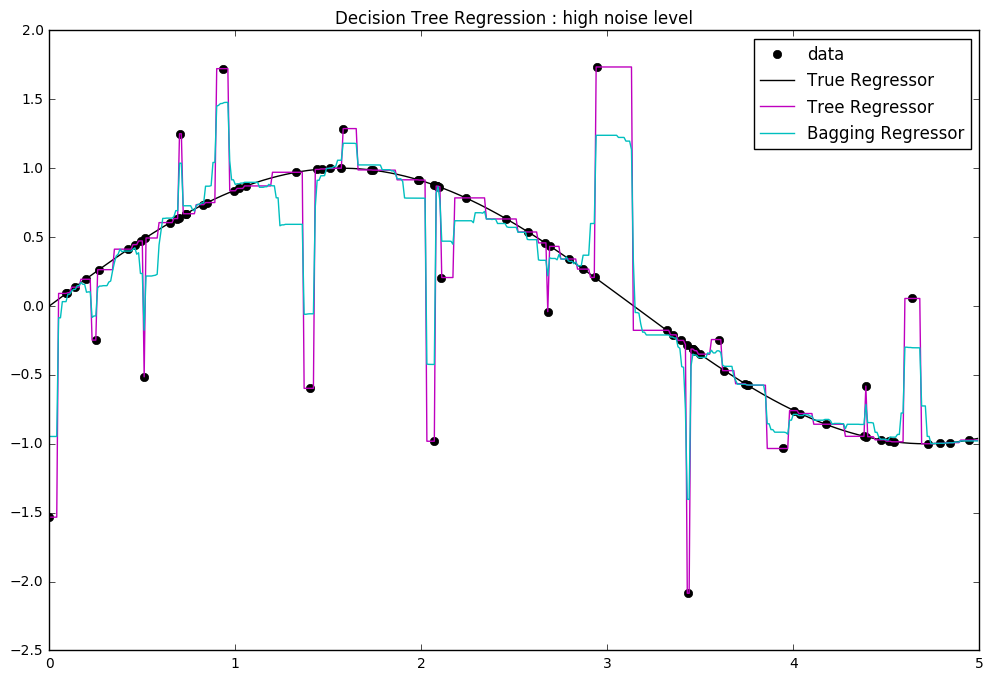

In [188]:
X_test, y_true, y_tree, y_bagging = bagging_tree(rng, X, y, n_estimators, tree_max_depth, bagging_max_depth, 1.0)
plot_BagTree(X_test, y_true, y_tree, y_bagging, "Decision Tree Regression : high noise level")

We clearly see that with higher noise level and with 100 iterations, there is overfitting. The regressor is too good and tries to pass by each point even though they are outliers. That is why the score is so low. 

### Q5

Tree score : 0.492385828814
Bagging score : 0.940165089963


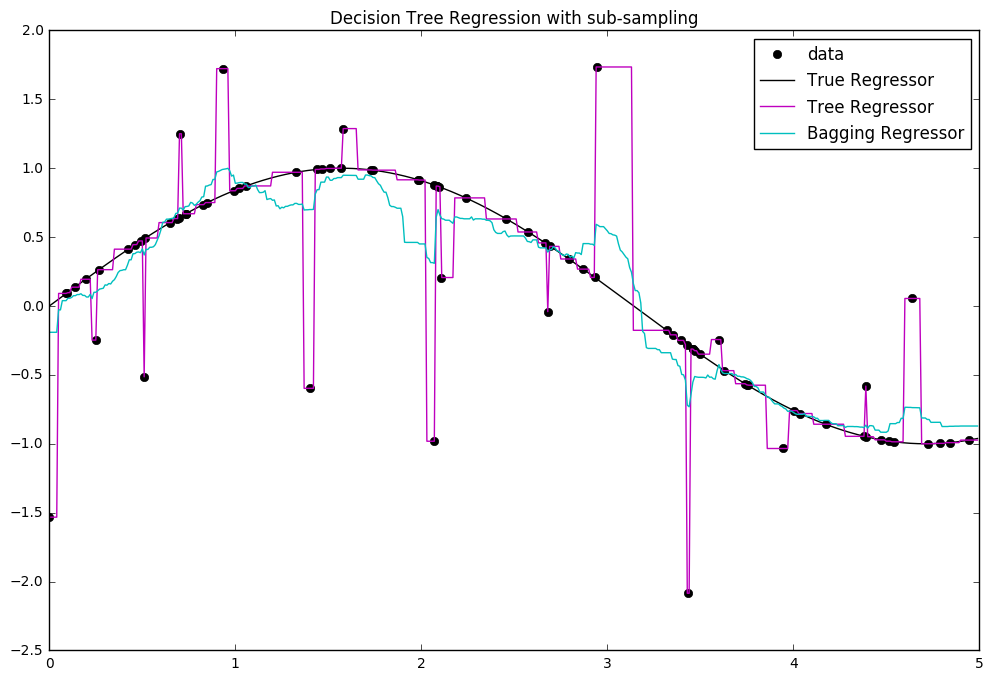

In [198]:
X_test, y_true, y_tree, y_bagging = bagging_tree(rng, X, y, n_estimators, tree_max_depth, bagging_max_depth, 0.25)
plot_BagTree(X_test, y_true, y_tree, y_bagging, "Decision Tree Regression with sub-sampling")

That way, with sub-sampling, we considerably reduce overfitting as we can see on the figure (do not pass by each outlier), and we increase the score (from 0.75 to 0.94). 

## Random Forests

### Q6 

In [207]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_digits

boston = load_boston()
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

ImportError: No module named model_selection

In [205]:
k_fold = KFold(n_splits = 7)


NameError: name 'KFold' is not defined